# Hierarchical clustering is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

This is what hierarchical clustering does. It finds elements of the dataset with similar properties under consideration and groups them together in a cluster.

Importing necessary libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now that our libraries are imported, let us read THE data to OUR workspace and print the first five rows using the head() function.

In [64]:
data = pd.read_excel (r'dataset1.xlsx')
data.head()

,Fructose,Glucose,Maltose,Turanose,Mélibiose+ Isomaltose,Saccharose,Tréhalose,Gentibiose,Palatinose,Raffinose,Erlose,Mélézitose,Maltotriose,Panose,Isomaltotriose
0,38.45,33.48,5.09,1.63,0.29,0.43,0.0,0.00,0,0.0,1.72,0.03,0.10,0,0
1,40.30,31.95,4.49,1.43,0.32,0.18,0.0,0.00,0,0.0,0.53,0.04,0.05,0,0
2,38.80,34.46,4.00,1.42,0.28,0.20,0.0,0.00,0,0.0,1.32,0.04,0.38,0,0
3,37.89,32.56,5.34,1.74,0.56,0.50,0.0,0.14,0,0.0,1.71,0.06,0.15,0,0
4,37.16,33.91,5.12,1.65,0.45,0.45,0.0,0.00,0,0.0,1.36,0.06,0.13,0,0


the shape attribute will tell us how many rows and columns we have, respectively

In [65]:
data.shape

(34, 15)

To see what characteristics has collected, we can see column names with the columns attribute. To do that, execute:

In [66]:
data.columns

Index(['Fructose', 'Glucose', 'Maltose', 'Turanose', 'Mélibiose+ Isomaltose',
       'Saccharose', 'Tréhalose', 'Gentibiose', 'Palatinose', 'Raffinose',
       'Erlose', 'Mélézitose', 'Maltotriose', 'Panose', 'Isomaltotriose'],
      dtype='object')

There are multiple categories – Fructose, Glucose, Turanose, etc. Suppose The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will, of course, use Hierarchical Clustering for this problem.

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fructose orGlucose (refer to the above table).

So, let’s first normalize the data and bring all the variables to the same scale:

In [67]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Fructose,Glucose,Maltose,Turanose,Mélibiose+ Isomaltose,Saccharose,Tréhalose,Gentibiose,Palatinose,Raffinose,Erlose,Mélézitose,Maltotriose,Panose,Isomaltotriose
0,0.749594,0.652703,0.099231,0.031777,0.005654,0.008383,0.0,0.000000,0.0,0.0,0.033532,0.000585,0.001950,0.0,0.0
1,0.780282,0.618610,0.086935,0.027687,0.006196,0.003485,0.0,0.000000,0.0,0.0,0.010262,0.000774,0.000968,0.0,0.0
2,0.744921,0.661598,0.076796,0.027263,0.005376,0.003840,0.0,0.000000,0.0,0.0,0.025343,0.000768,0.007296,0.0,0.0
3,0.753162,0.647215,0.106146,0.034587,0.011131,0.009939,0.0,0.002783,0.0,0.0,0.033991,0.001193,0.002982,0.0,0.0
4,0.734157,0.669948,0.101154,0.032598,0.008890,0.008890,0.0,0.000000,0.0,0.0,0.026869,0.001185,0.002568,0.0,0.0


Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem
==> check for the lagest distence verticaly without crossing any horizontal line

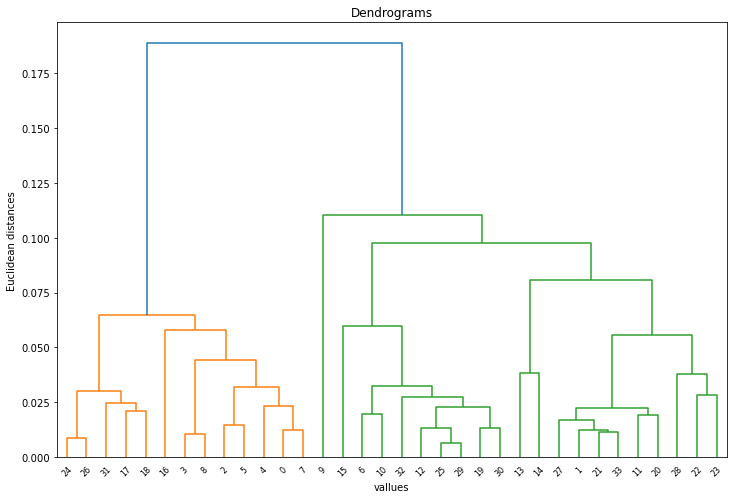

In [74]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 8))  
plt.title("Dendrograms")  
plt.xlabel('vallues') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 0.125 and cut the dendrogram

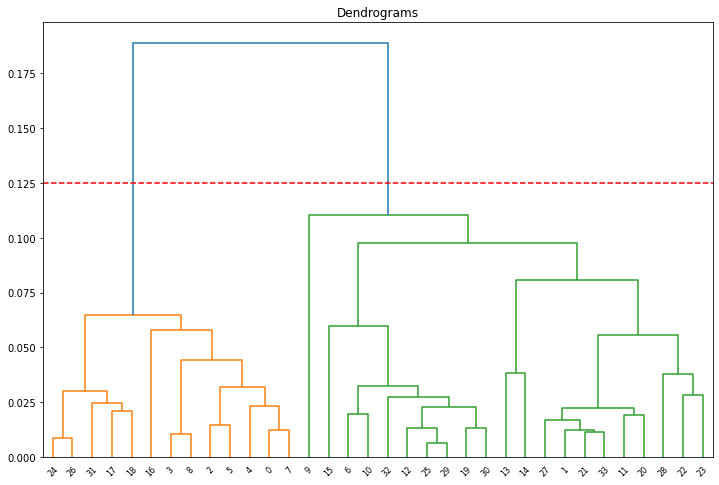

In [69]:
plt.figure(figsize=(12, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.125, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters
We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

In [84]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

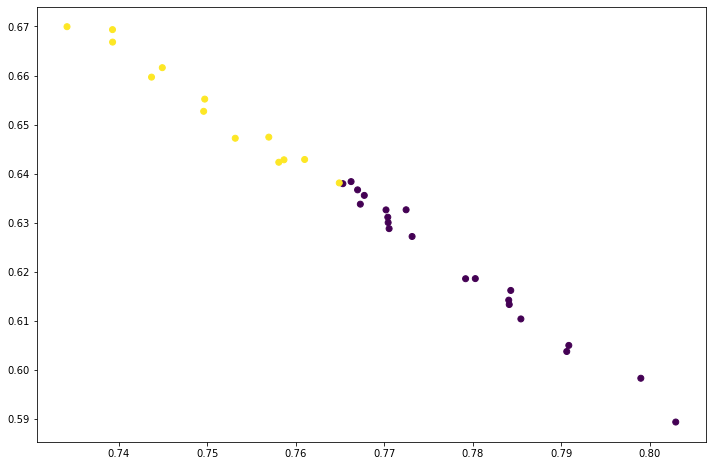

In [85]:
plt.figure(figsize=(12, 8))  
plt.scatter(data_scaled['Fructose'], data_scaled['Glucose'], c=cluster.labels_) 